# DDM: MODEL VALIDATION

# 1. Dataset Definition

In [1]:
import yaml

# SELECT CONFIG FILE TO READ DATA FROM
config_file = "conf//data//cartpole_st_at.yaml"

In [2]:
# For quick prototyping we will test on the fitted model. If model is not even good, then we need to reiterate
##from sklearn.model_selection import train_test_split
##x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.33, random_state=42)

# Open and extract sim config from YAML file
with open(config_file, 'r') as file:
    data_config = yaml.load(file, Loader=yaml.FullLoader)

# Extract features from yaml file
input_cols = data_config['data']['inputs']
output_cols = data_config['data']['outputs']
augmented_cols = data_config['data']['augmented_cols']
dataset_path = data_config['data']['path']
iteration_order = data_config['data']['iteration_order']
episode_col = data_config['data']['episode_col']
iteration_col = data_config['data']['iteration_col']
max_rows = data_config['data']['max_rows']


config_file = "conf//model//xgboost.yaml"
# Open and extract sim config from YAML file
with open(config_file, 'r') as file:
    model_config = yaml.load(file, Loader=yaml.FullLoader)

print("DATA STRUCTURE SELECTED:")
print(" - input_cols:", input_cols)
print(" - augmented_cols:", augmented_cols)
print(" - output_cols:", output_cols)

DATA STRUCTURE SELECTED:
 - input_cols: ['state_x_position', 'state_x_velocity', 'state_angle_position', 'state_angle_velocity']
 - augmented_cols: ['config_length', 'config_masspole', 'action_command']
 - output_cols: ['state_x_position', 'state_x_velocity', 'state_angle_position', 'state_angle_velocity']


# 2. Model Definition

In [3]:
import gboost_models
import skmodels

GBoostModel = gboost_models.GBoostModel
SKModel = skmodels.SKModel

# SELECT MODEL TO BE USED
model_to_be_used = 5

In [4]:
if model_to_be_used == 1:
    # XGBOOST
    save_path = "models/boost/moab/xgboost_model"
    model_name = "xgboost"
    scale_data = False
    print(f"Model selected '{model_name}' --> scale_data == {scale_data}")

    model = GBoostModel()
    
elif model_to_be_used == 2:
    # LIGHTGBM
    save_path = "models/boost/moab/lightgbm"
    model_name = "lightgbm"
    scale_data = False
    print(f"Model selected '{model_name}' --> scale_data == {scale_data}")

    model = GBoostModel()
    
elif model_to_be_used == 3:
    # SVR
    save_path = "models/sklearn/moab/SVR"
    model_name = "SVR"
    scale_data = False
    print(f"Model selected '{model_name}' --> scale_data == {scale_data}")

    model = SKModel()
    
elif model_to_be_used == 4:
    # GRADIENT BOOSTING
    save_path = "models/sklearn/moab/GradientBoostingRegressor"
    model_name = "GradientBoostingRegressor"
    scale_data = False
    print(f"Model selected '{model_name}' --> scale_data == {scale_data}")

    model = SKModel()
    
elif model_to_be_used == 5:
    # LINEAR MODEL
    save_path = "models/sklearn/moab/linear_model"
    model_name = "linear_model"
    scale_data = True
    print(f"Model selected '{model_name}' --> scale_data == {scale_data}")

    model = SKModel()


Model selected 'linear_model' --> scale_data == True


# 3. Model Creation, Fitting, & Saving

In [5]:

X, y = model.load_csv(
    input_cols=input_cols,
    output_cols=output_cols,
    augm_cols=augmented_cols,
    dataset_path=dataset_path,
    iteration_order=iteration_order,
    episode_col=episode_col,
    iteration_col=iteration_col,
    max_rows=max_rows,
)
#logger.info("Building model...")
model.build_model(model_type=model_name, scale_data=scale_data)
#logger.info("Fitting model...")
model.fit(X, y, fit_separate=False)

#logger.info(f"Saving model to {save_path}")
model.save_model(filename=save_path)


INFO:data_loaders:Iteration order set to 1 so using outputs from next 1 row
INFO:data_loaders:Next states are being added to same row with prefix next
INFO:data_loaders:Feature columns are: ['next_state_x_position', 'next_state_x_velocity', 'next_state_angle_position', 'next_state_angle_velocity', 'next_config_length', 'next_config_masspole', 'next_action_command']
INFO:data_loaders:Label columns are: ['state_x_position', 'state_x_velocity', 'state_angle_position', 'state_angle_velocity']
INFO:skmodels:Scale transformations used, saving to models/sklearn/moab/linear_model


In [6]:
print("DATA STRUCTURE FROM UPLOADED MODEL:")
print(" - input_cols:", model.features)
print(" - output_cols:", model.labels)

DATA STRUCTURE FROM UPLOADED MODEL:
 - input_cols: ['state_x_position', 'state_x_velocity', 'state_angle_position', 'state_angle_velocity', 'config_length', 'config_masspole', 'action_command']
 - output_cols: ['state_x_position', 'state_x_velocity', 'state_angle_position', 'state_angle_velocity']


# 4. Pre-analysis: Estimated Error

In [7]:
from assessment_metrics_loader import available_metrics
rms_error = available_metrics["root_mean_squared_error"]
ms_error = available_metrics["mean_squared_error"]

In [8]:
per_iteration_eval_table = model.evaluate(X, y, rms_error, marginal=True)
per_iteration_eval_table

C:\Users\juanvergara\Anaconda3\envs\ddm_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight=None, multioutput=uniform_average, squared=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\juanvergara\Anaconda3\envs\ddm_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight=None, multioutput=uniform_average, squared=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\juanvergara\Anaconda3\envs\ddm_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight=None, multioutput=uniform_average, squared=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\juanvergara\Anaconda3\envs\ddm_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight

,var,score
0,state_x_position,0.235362
1,state_x_velocity,0.192807
2,state_angle_position,0.052741
3,state_angle_velocity,7.589986


In [9]:
sequential_eval_table = model.evaluate_sequentially(X, y, rms_error, marginal=True, it_per_episode=50)
sequential_eval_table

C:\Users\juanvergara\Anaconda3\envs\ddm_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight=None, multioutput=uniform_average, squared=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\juanvergara\Anaconda3\envs\ddm_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight=None, multioutput=uniform_average, squared=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\juanvergara\Anaconda3\envs\ddm_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight=None, multioutput=uniform_average, squared=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\juanvergara\Anaconda3\envs\ddm_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight

,var,score
0,state_x_position,2.357148e+19
1,state_x_velocity,2.617956e+21
2,state_angle_position,3.114472e+21
3,state_angle_velocity,3.057629e+23


In [10]:
if (per_iteration_eval_table["score"] > 1.0).any():
    raise Exception("Per-iteration assessment error is high. Please, review your model")

if (sequential_eval_table["score"] > 1.0).any():
    raise Exception("Sequentially analyzed assessment error is high. Please, review your model")

Exception: Per-iteration assessment error is high. Please, review your model

# 5. In-Depth Analysis: Predictions

In [11]:
import matplotlib.pyplot as plt
import numpy as np

action_feat = "action_command"

In [12]:
## RUN BOTH PER ITERATION & SEQUENTIAL PREDICTIONS
##preds = model.predict(X)
##preds_sequentially = model.predict_sequentially(X,it_per_episode=10)

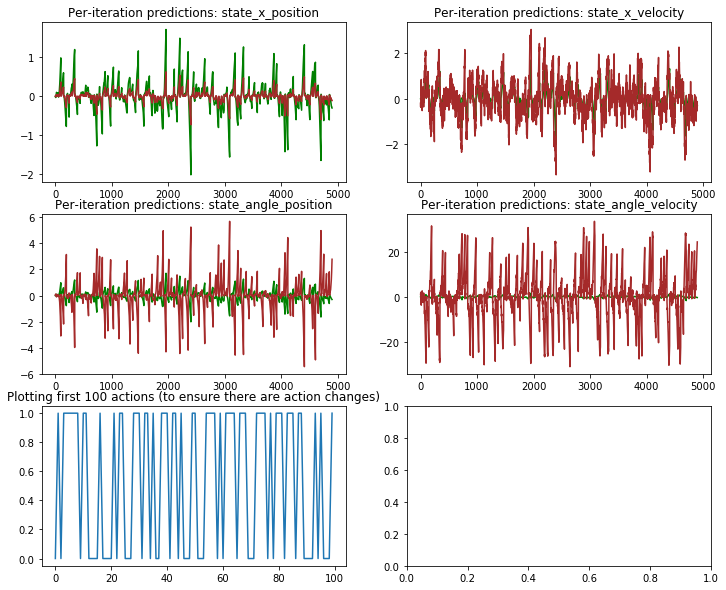

In [13]:
# PER-ITERATION RUN
preds = model.predict(X)

# Plot results graphs
label_count = np.shape(preds)[1]
fig,axs = plt.subplots(3,2,)
for i in range(label_count):
    axs[i//2,i%2].set_title(f"Per-iteration predictions: {model.labels[i]}")
    axs[i//2,i%2].plot(y[:,0], "green")
    axs[i//2,i%2].plot(preds[:,i], "brown")
    
# Plot action changes
action_idx = model.features.index(action_feat)
axs[(i+1)//2,(i+1)%2].set_title("Plotting first 100 actions (to ensure there are action changes)")
axs[(i+1)//2,(i+1)%2].plot(X[:100,action_idx])

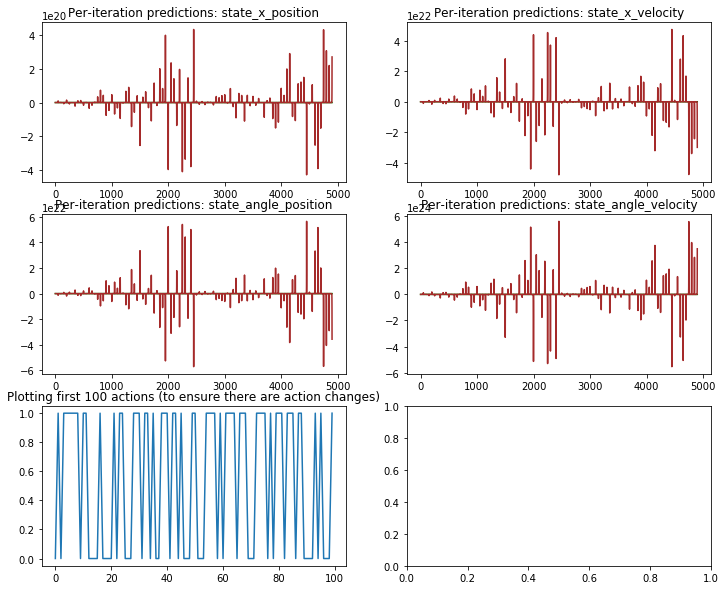

In [14]:
# SEQUENTIAL RUN
preds_sequentially = model.predict_sequentially(X, it_per_episode=50)

# Plot results graphs
label_count = np.shape(preds_sequentially)[1]
fig,axs = plt.subplots(3,2,)
for i in range(label_count):
    axs[i//2,i%2].set_title(f"Per-iteration predictions: {model.labels[i]}")
    axs[i//2,i%2].plot(y[:,0], "green")
    axs[i//2,i%2].plot(preds_sequentially[:,i], "brown")
    
# Plot action changes
action_idx = model.features.index(action_feat)
axs[(i+1)//2,(i+1)%2].set_title("Plotting first 100 actions (to ensure there are action changes)")
axs[(i+1)//2,(i+1)%2].plot(X[:100,action_idx])